Comparison: Year 2016, Old: 202007Cp2 New:202007D-again

In [87]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [88]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [89]:
year = '2016'
olddir = '202007/202007C-p2/'
newdir = '202007/202007D-again/'

In [4]:
def surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=False, olddir=olddir, zoom=[0, 0, 0, 0], dl=0):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

    if twoD:
        mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0, 0])
    else:
        mean_field = np.ma.array(dm[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[0].pcolormesh(mean_field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(olddir)
    fig.colorbar(colours, ax=axs[0])
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if twoD:
        field = np.ma.array(ds[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(ds[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[1].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(newdir)
    fig.colorbar(colours, ax=axs[1])
    
    colours = axs[2].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title("New - Old")
    fig.colorbar(colours, ax=axs[2])
    ds.close()
    dm.close()


    for ax in axs:
        viz_tools.set_aspect(ax)
        if sum(zoom) > 0:
            ax.set_ylim(zoom[0], zoom[1])
            ax.set_xlim(zoom[2], zoom[3])

    return fig

In [5]:
def profiles(tracer, file, olddir=olddir):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0])
    axs[0].plot(mean_field.mean(axis=1).mean(axis=1), deptht, linewidth=2, label='Old')
    axs[1].plot(np.zeros_like(deptht), deptht, linewidth=2, label='Old')
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

    field = np.ma.array(ds[tracer][0], mask=1-tmask[0])
    axs[0].plot(field.mean(axis=1).mean(axis=1), deptht, label='New')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, label='New')
    print (mean_field.mean(axis=1).mean(axis=1).max(), field.mean(axis=1).mean(axis=1).max())
    ds.close()
    dm.close()

    
    axs[0].invert_yaxis()
    axs[0].legend(loc='best')
    
    axs[1].invert_yaxis()
    axs[1].legend(loc='best')
    
    return fig

In [60]:
def thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir=olddir, maxdepth=0):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    mean_field = np.array(dm[tracer][0])
    colours = vis.contour_thalweg(axs[0], mean_field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)
    axs[0].set_title(olddir)

    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    field = np.array(ds[tracer][0])
    colours = vis.contour_thalweg(axs[1], field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)

    axs[1].set_title(newdir)
    colours = vis.contour_thalweg(axs[2], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                      cmap=cdiff)
 
    axs[2].set_title('New - Old')
    if maxdepth > 0:
        for ax in axs:
            ax.set_ylim(maxdepth, 0)
    ds.close()
    dm.close()

    fig.tight_layout()
    return fig

## January: Temperature

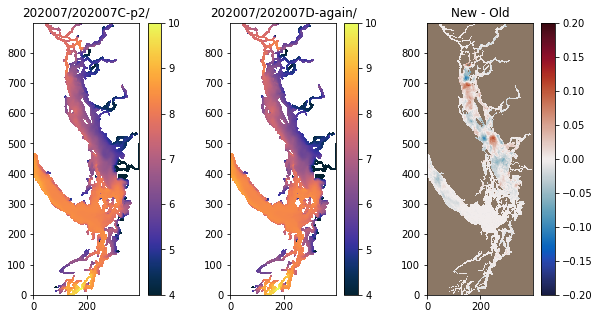

In [31]:
tracer = 'votemper'
file = 'grid'
month = '01'
cmap = cm.thermal
cdiff = cm.balance
vmax = 10
vmin = 4
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

9.581097123442754 9.581083438743553


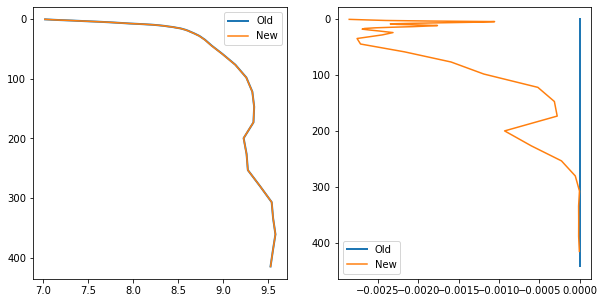

In [32]:
fig = profiles(tracer, file)

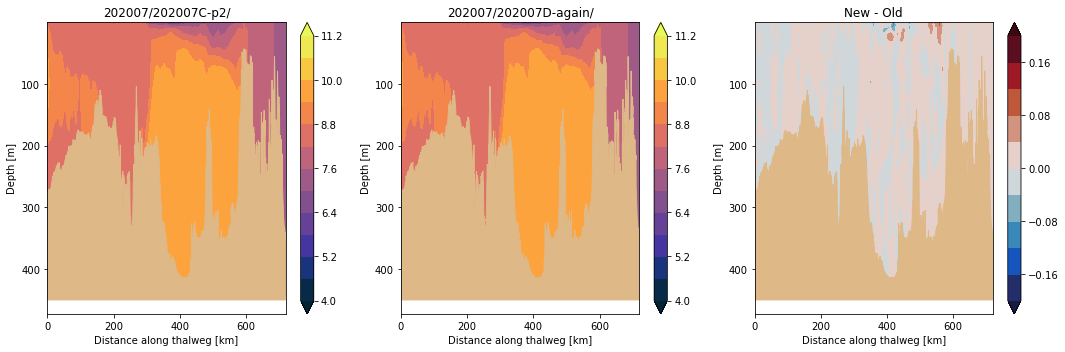

In [33]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## January: Nitrate

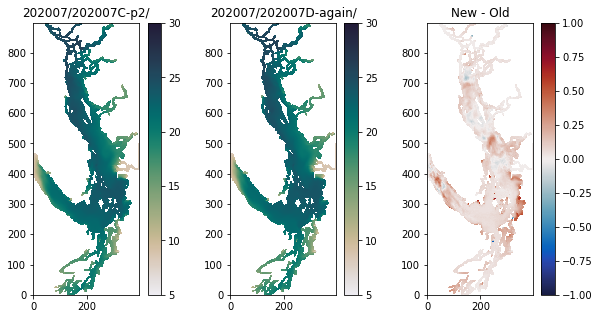

In [9]:
tracer = 'nitrate'
file = 'ptrc'
month = '01'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 5
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

28.439861840096423 28.43967309719228


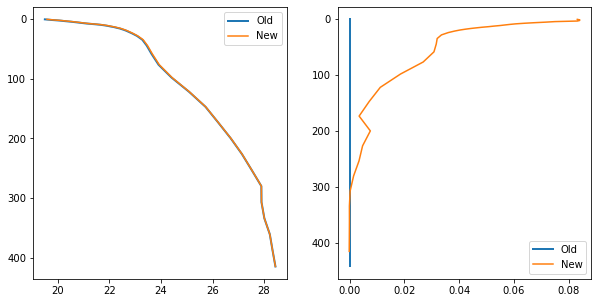

In [10]:
fig = profiles(tracer, file)

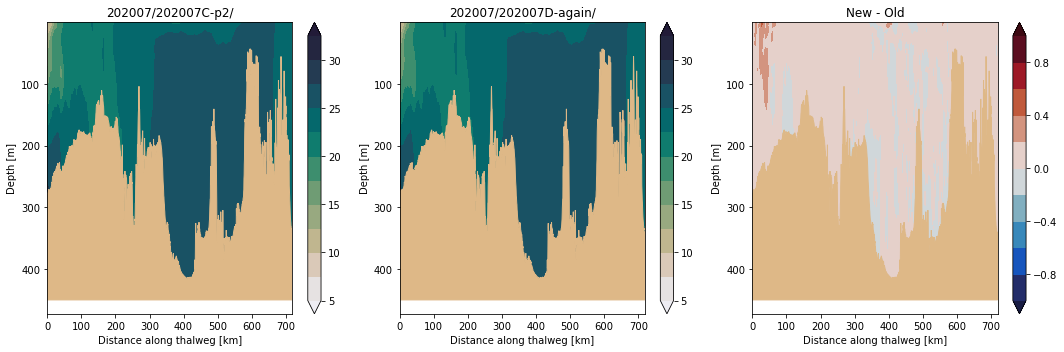

In [11]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February: Nitrate

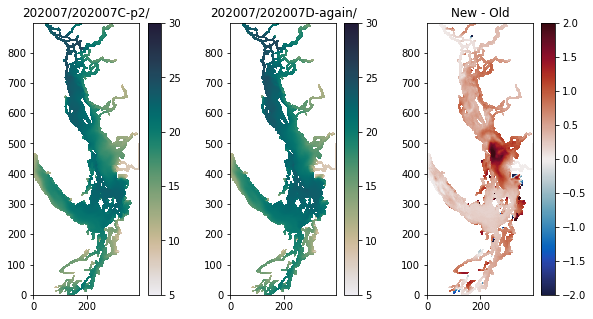

In [12]:
tracer = 'nitrate'
file = 'ptrc'
month = '02'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 5
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

28.624797858548128 28.6243829237479


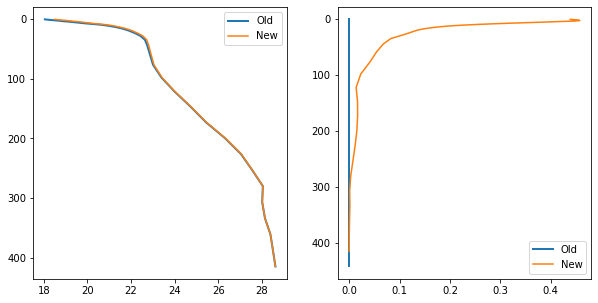

In [13]:
fig = profiles(tracer, file)

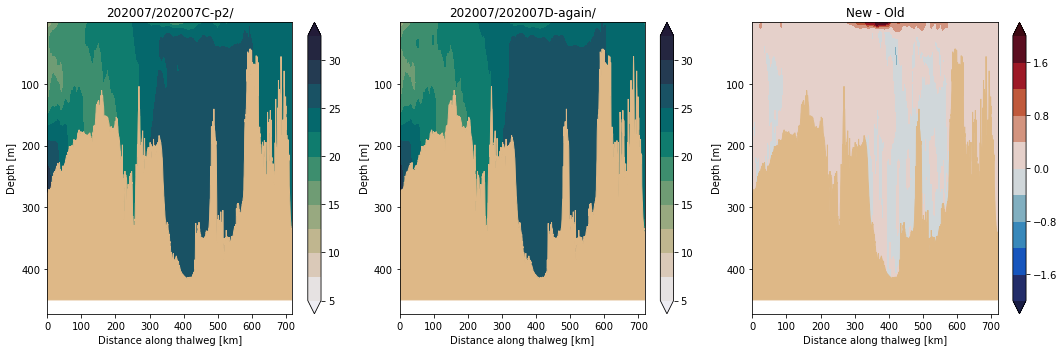

In [14]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February: Flagellates

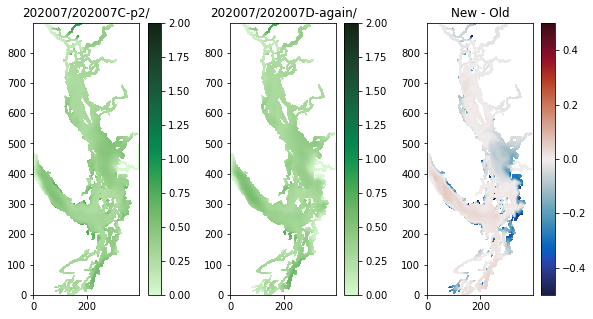

In [15]:
tracer = 'flagellates'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.33331765796593593 0.31882724395670614


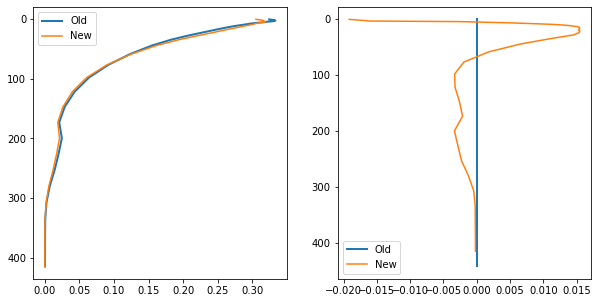

In [16]:
fig = profiles(tracer, file)

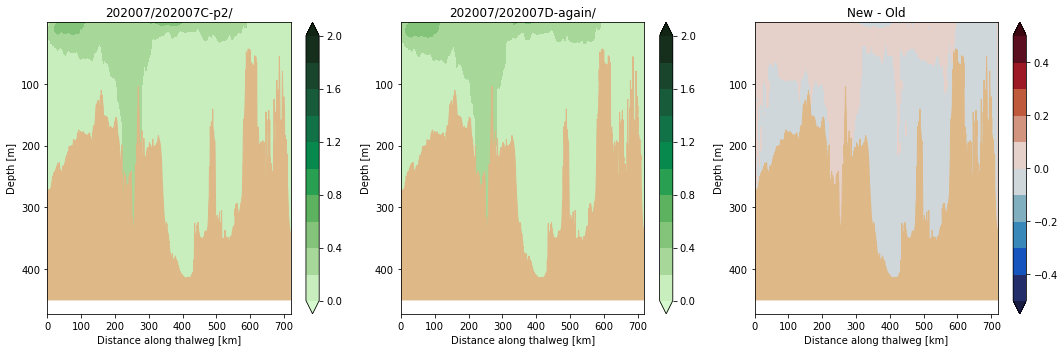

In [17]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February: Diatoms

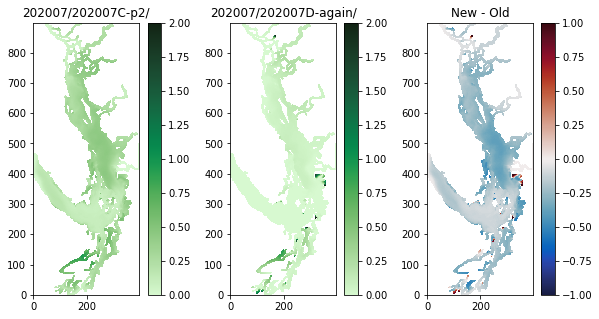

In [18]:
tracer = 'diatoms'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.24827228802158868 0.054058585115943865


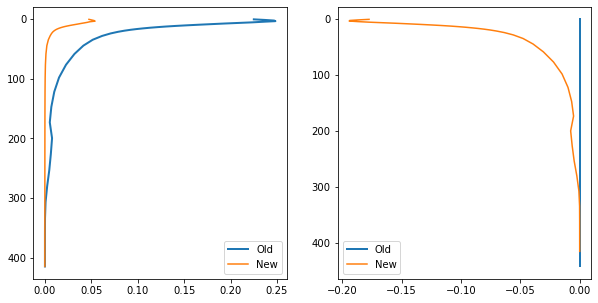

In [19]:
fig = profiles(tracer, file)

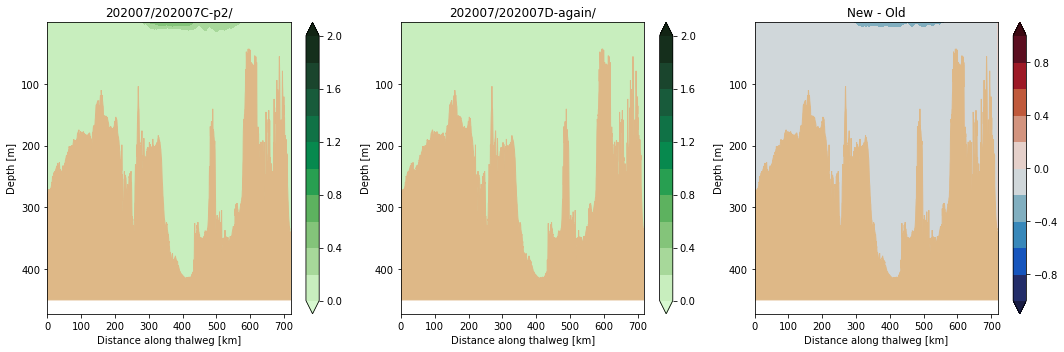

In [20]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March: Diatoms

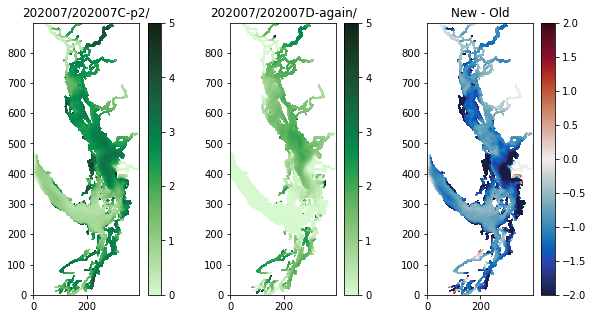

In [21]:
tracer = 'diatoms'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.768081371546971 0.7464259383228652


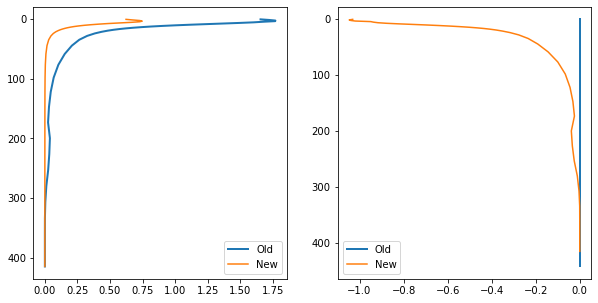

In [22]:
fig = profiles(tracer, file)

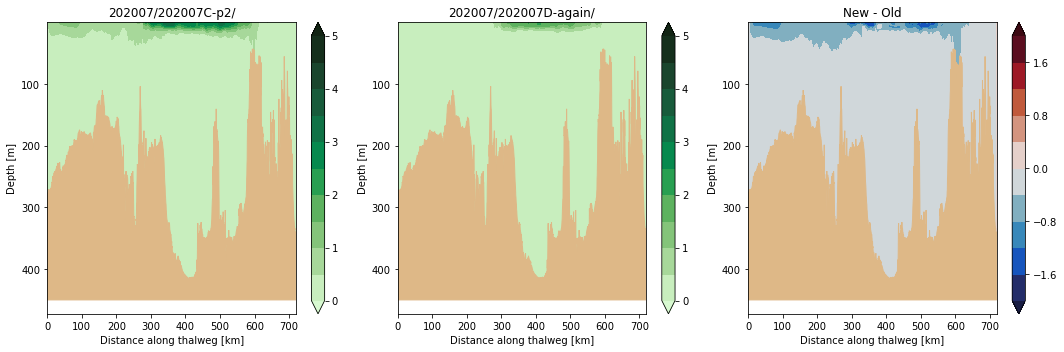

In [23]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March: Flagellates

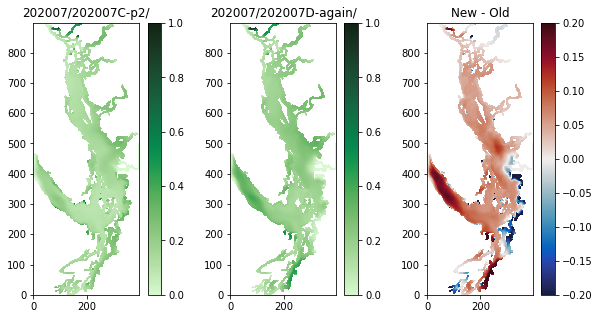

In [24]:
tracer = 'flagellates'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.1545471034848968 0.2112848271359103


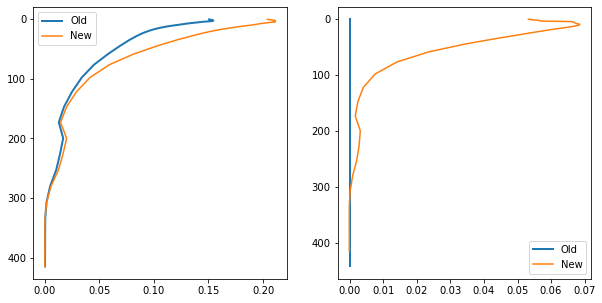

In [25]:
fig = profiles(tracer, file)

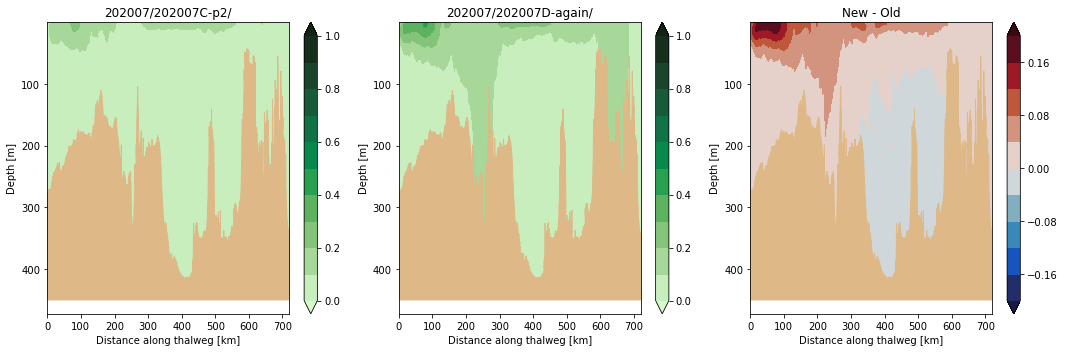

In [26]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## April: Microzooplankton

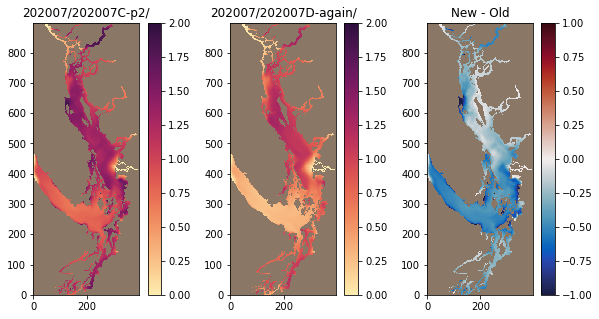

In [27]:
tracer = 'microzooplankton'
file = 'ptrc'
month = '04'
cmap = cm.matter
cmap.set_bad('#8b7765')
cb1 = "Microzooplankton (uM N)"
cdiff = cm.balance
cdiff.set_bad('#8b7765')
cb2 = 'Microzooplankton (uM N)'
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.0200889110959337 0.6259720035864819


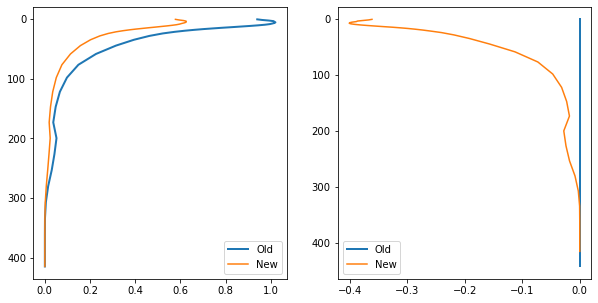

In [28]:
fig = profiles(tracer, file)

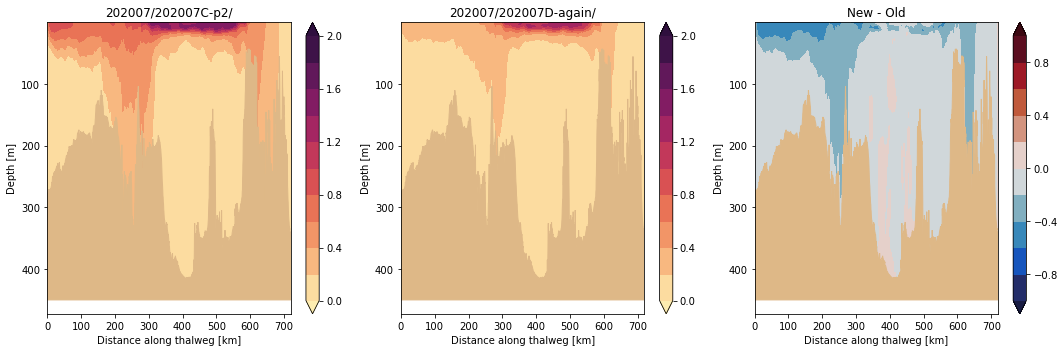

In [29]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## May: Salinity

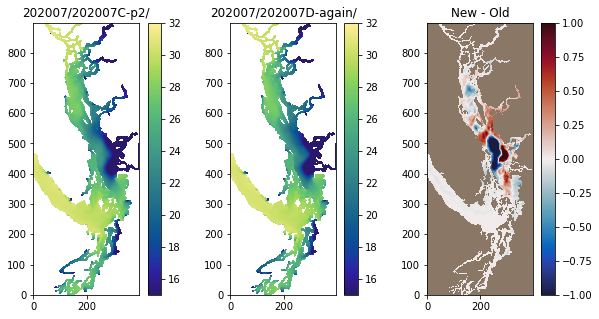

In [50]:
tracer = 'vosaline'
file = 'grid'
month = '05'
cmap = cm.haline
cdiff = cm.balance
vmax = 32
vmin = 15
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

31.822946917514972 31.824265021076055


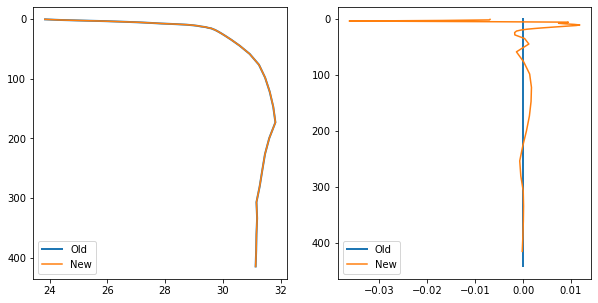

In [51]:
fig = profiles(tracer, file)

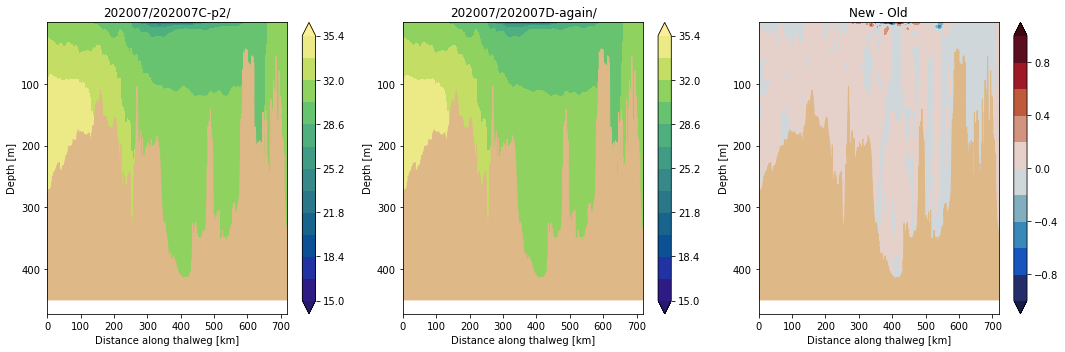

In [52]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## May Diatoms

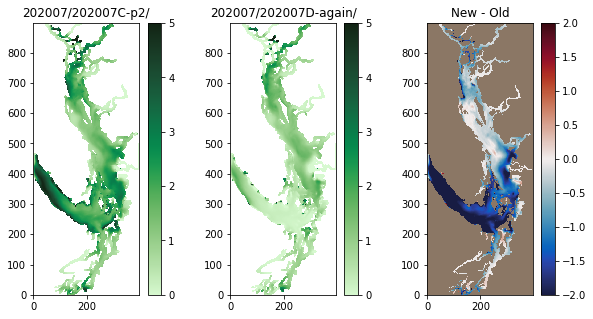

In [34]:
tracer = 'diatoms'
file = 'ptrc'
month = '05'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2.0999518275956275 0.9155043099275968


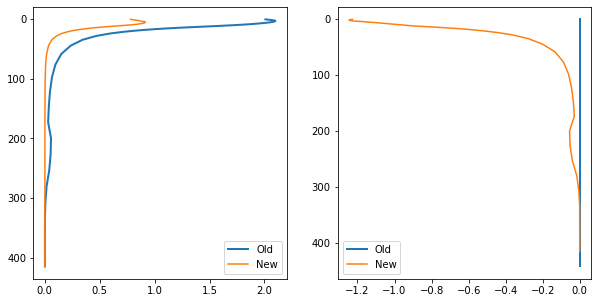

In [35]:
fig = profiles(tracer, file)

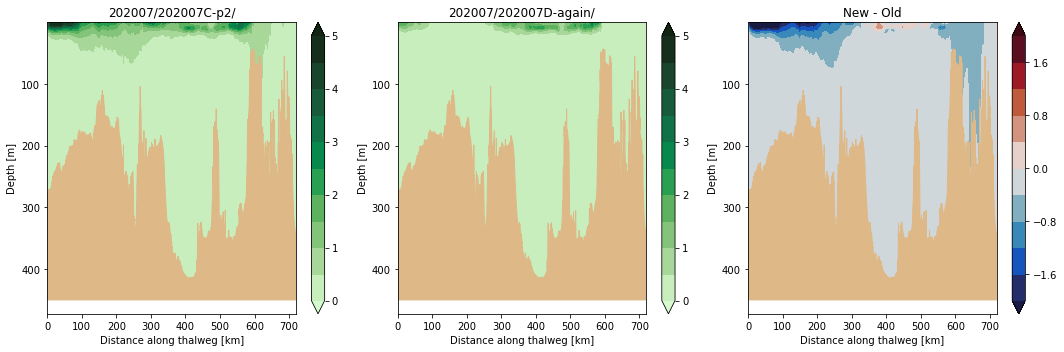

In [36]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## May Diatoms compared to H201812

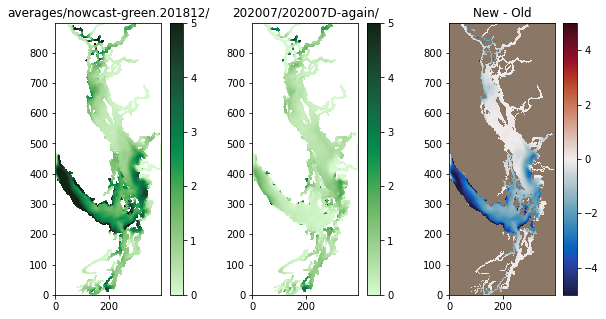

In [17]:
tracer = 'diatoms'
file = 'ptrc'
month = '05'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, 
                    olddir='averages/nowcast-green.201812/')

2.241305312051413 0.7375479578738783


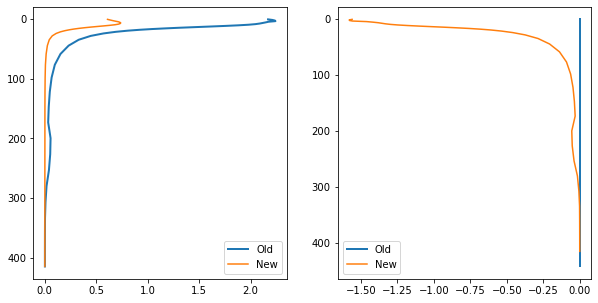

In [18]:
fig = profiles(tracer, file, olddir='averages/nowcast-green.201812/')

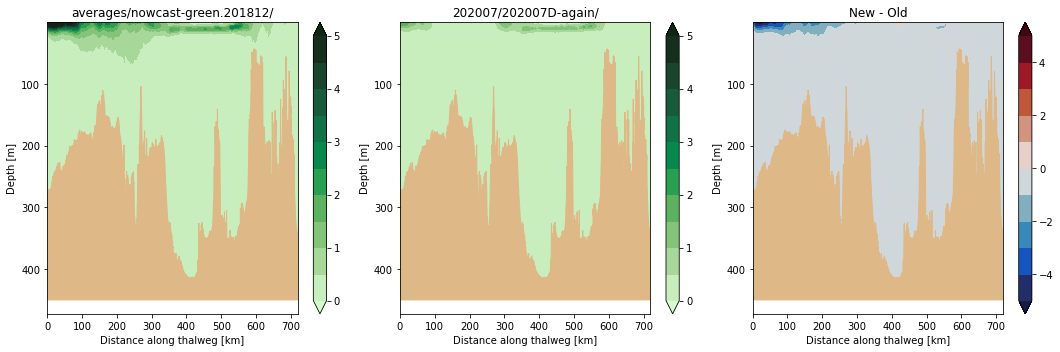

In [19]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/nowcast-green.201812/')

## June: Flagellates

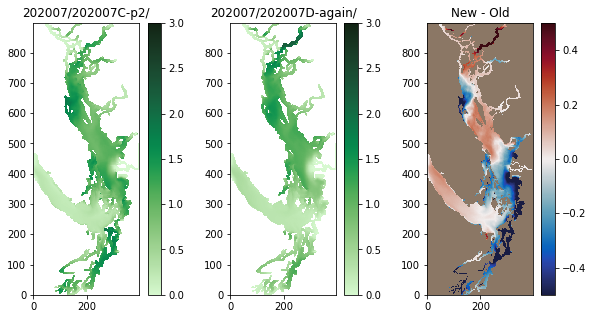

In [57]:
tracer = 'flagellates'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 3
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.7513790105631262 0.6630734679953634


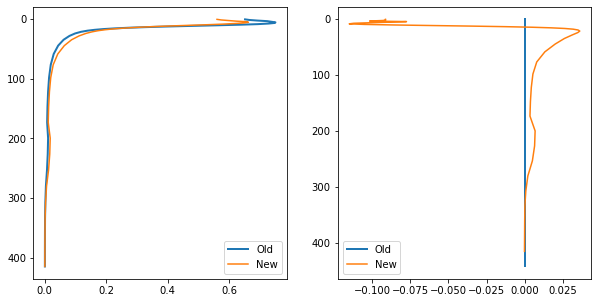

In [58]:
fig = profiles(tracer, file)

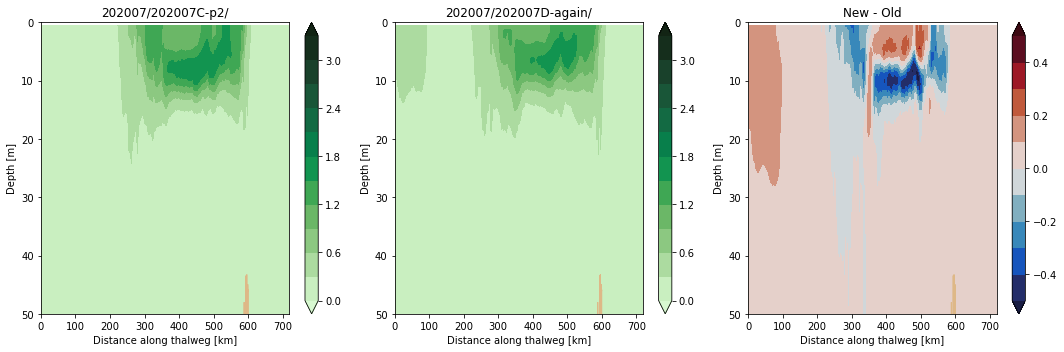

In [61]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, maxdepth=50)

## June Diatoms

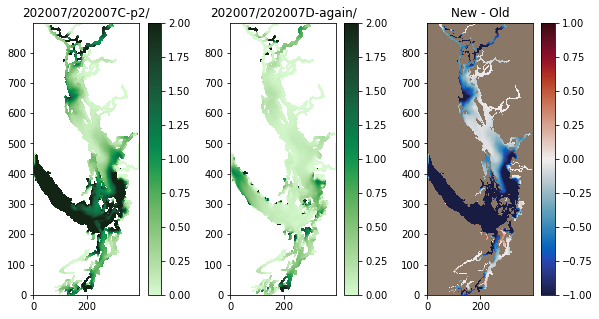

In [65]:
tracer = 'diatoms'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.745846166017548 0.3396668061536493


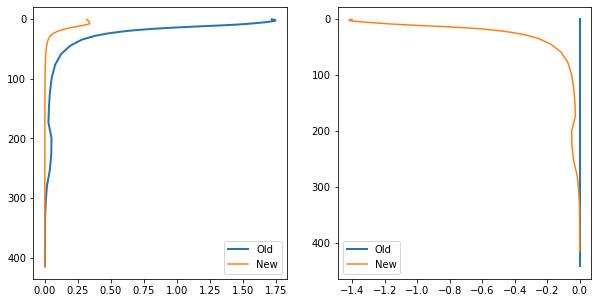

In [66]:
fig = profiles(tracer, file)

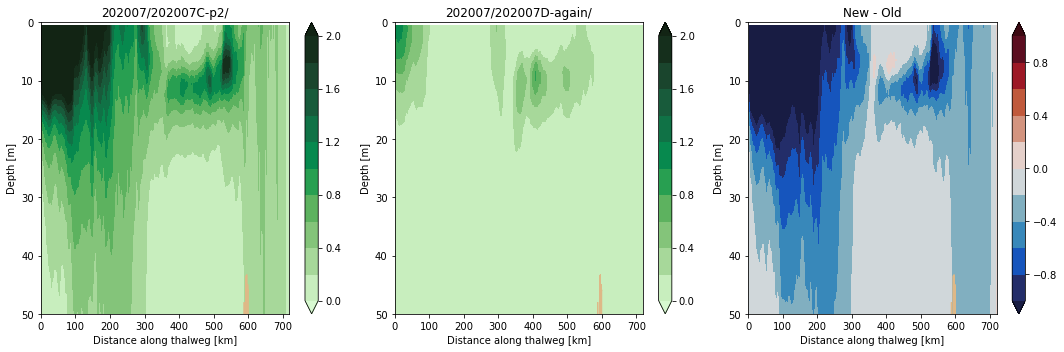

In [67]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, maxdepth=50)

## June Diatoms against 201812 Hindcast

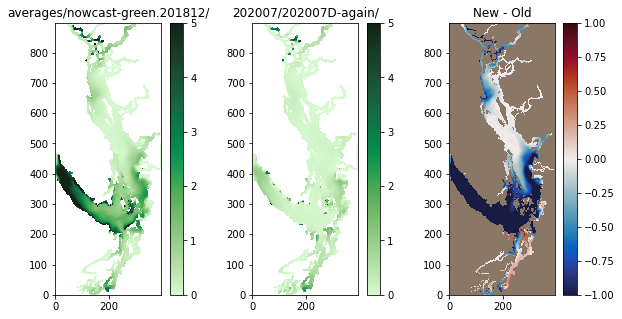

In [43]:
tracer = 'diatoms'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, 
                    olddir='averages/nowcast-green.201812/')

1.7502578226526837 0.3396668061536493


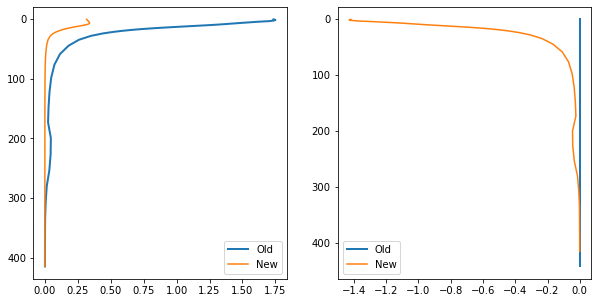

In [44]:
fig = profiles(tracer, file, olddir='averages/nowcast-green.201812/')

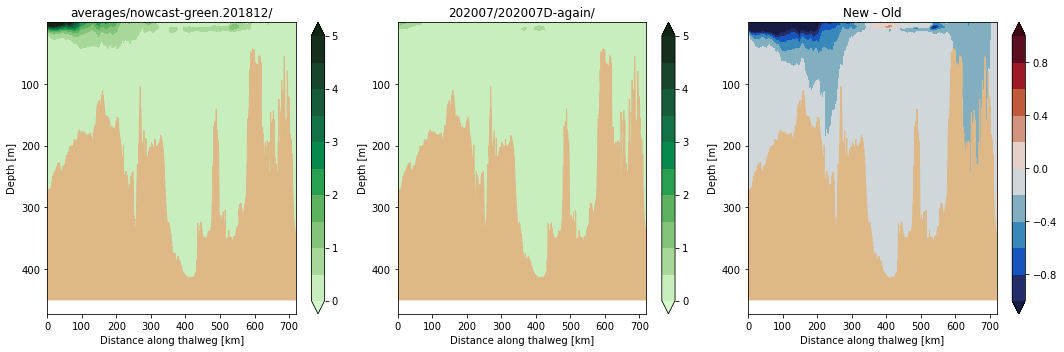

In [45]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, 
                    olddir='averages/nowcast-green.201812/')

## July : NH4

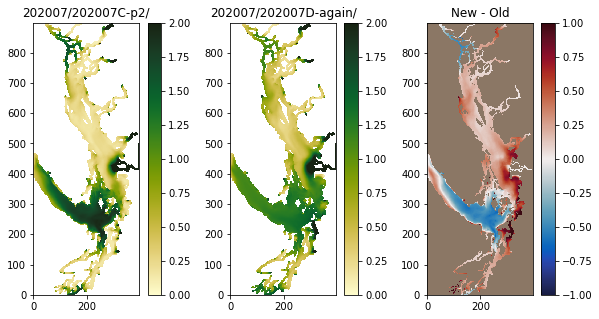

In [46]:
tracer = 'ammonium'
file = 'ptrc'
month = '07'
cmap = cm.speed
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.9408849971725584 1.4692948706469529


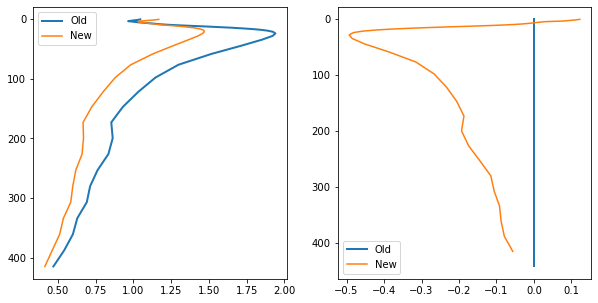

In [47]:
fig = profiles(tracer, file)

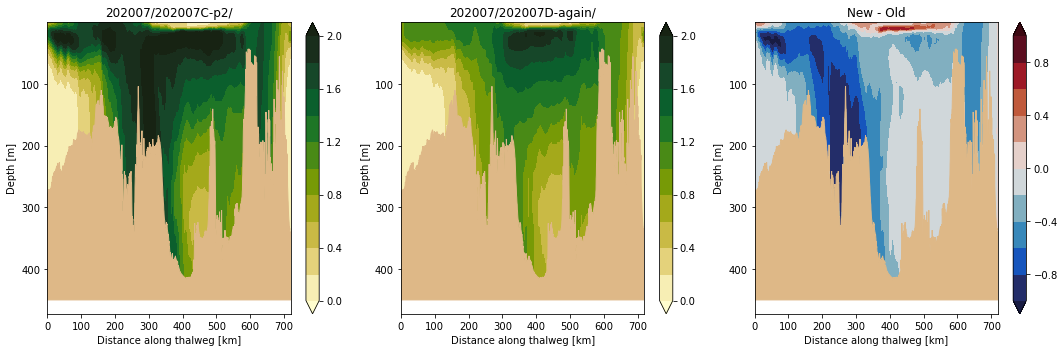

In [48]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## August: SSH

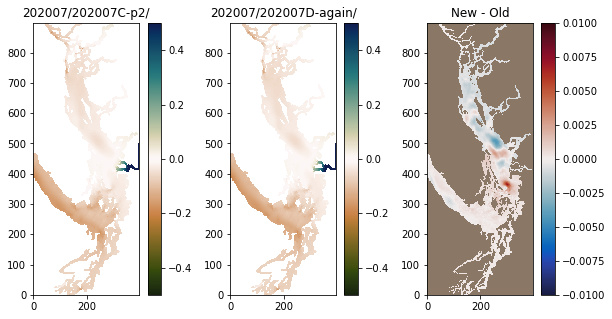

In [49]:
tracer = 'sossheig'
file = 'grid'
month = '08'
cmap = cm.tarn
cdiff = cm.balance
vmax = 0.5
vmin = -0.5
dvmax = 0.01
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=True)

## September: PON

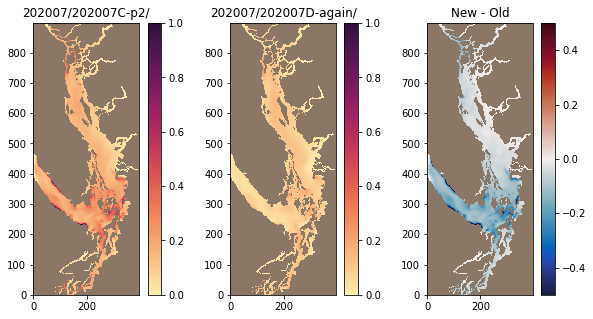

In [53]:
tracer = 'particulate_organic_nitrogen'
file = 'ptrc'
month = '09'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.499495771875287 0.27681114588829414


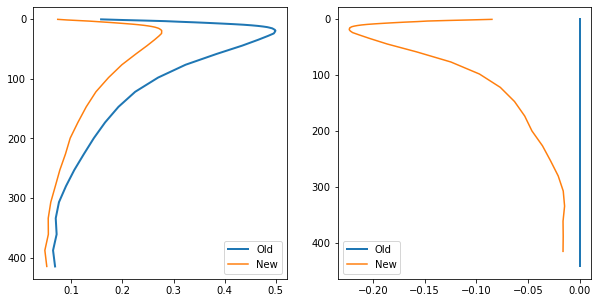

In [54]:
fig = profiles(tracer, file)

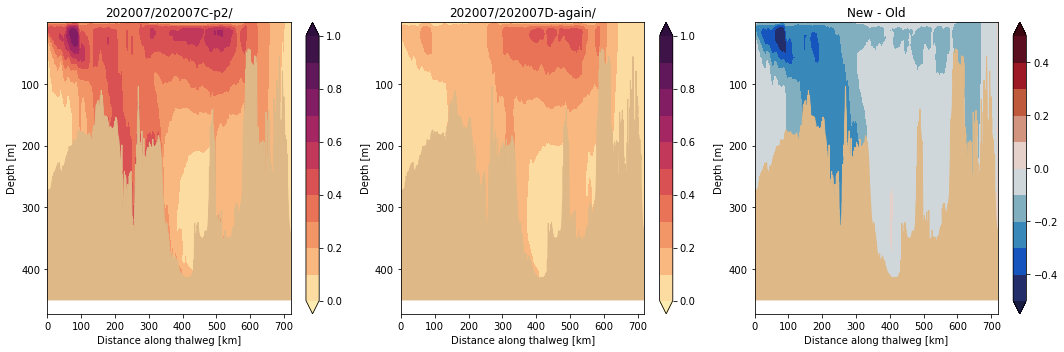

In [55]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## October: dissolved Silicon

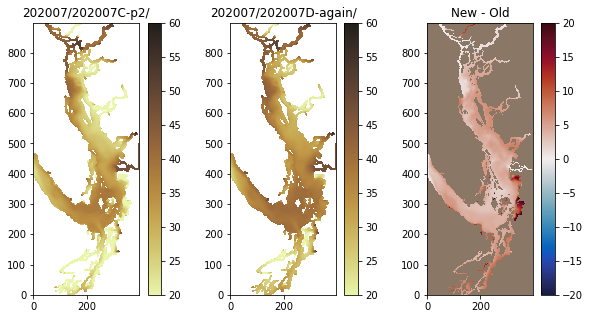

In [90]:
tracer = 'silicon'
file = 'ptrc'
month = '10'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 20
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

58.65077875185656 56.141559565381954


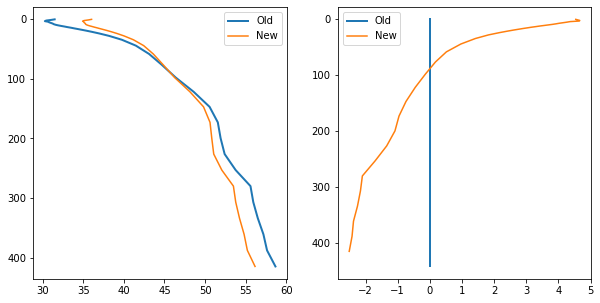

In [91]:
fig = profiles(tracer, file)

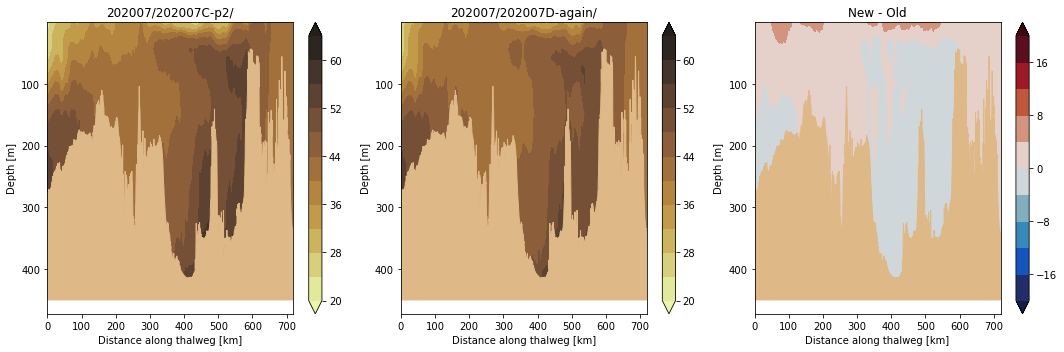

In [92]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## November: DIC

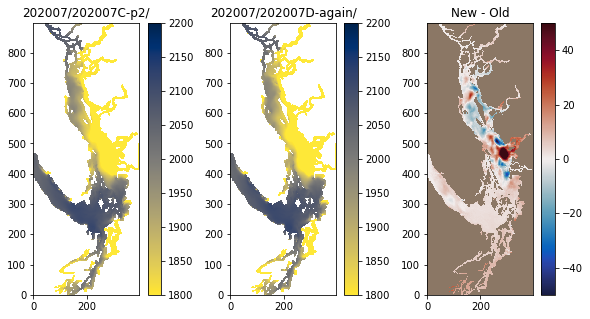

In [93]:
tracer = 'dissolved_inorganic_carbon'
file = 'carp'
month = '11'
cmap = 'cividis_r'
cdiff = cm.balance
vmax = 2200
vmin = 1800
dvmax = 50
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2176.127833057886 2175.448198203147


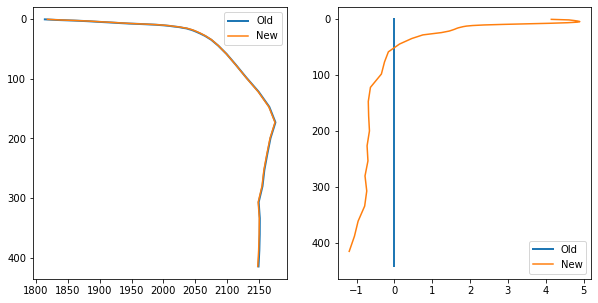

In [94]:
fig = profiles(tracer, file)

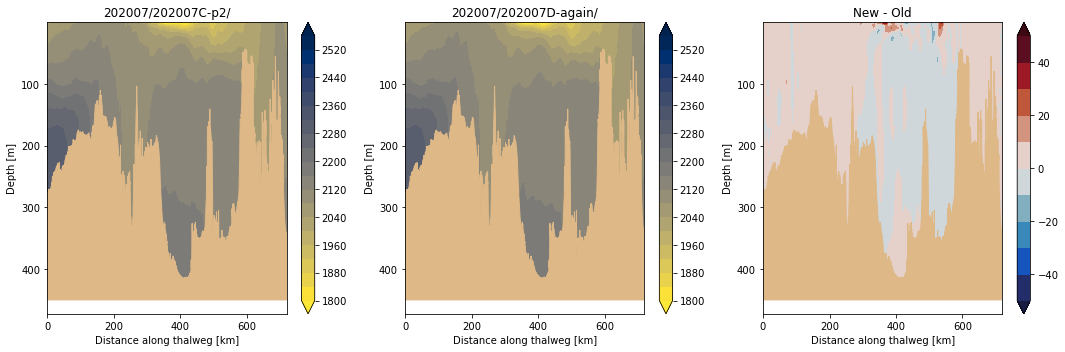

In [95]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## November Nitrate

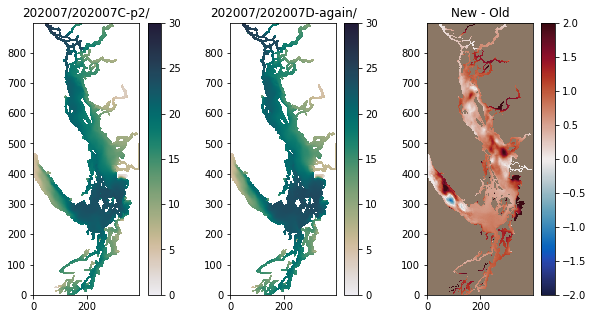

In [96]:
tracer = 'nitrate'
file = 'ptrc'
month = '11'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

27.74677192841322 27.557801052719675


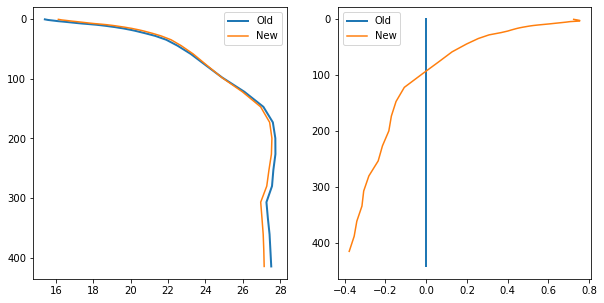

In [97]:
fig = profiles(tracer, file)

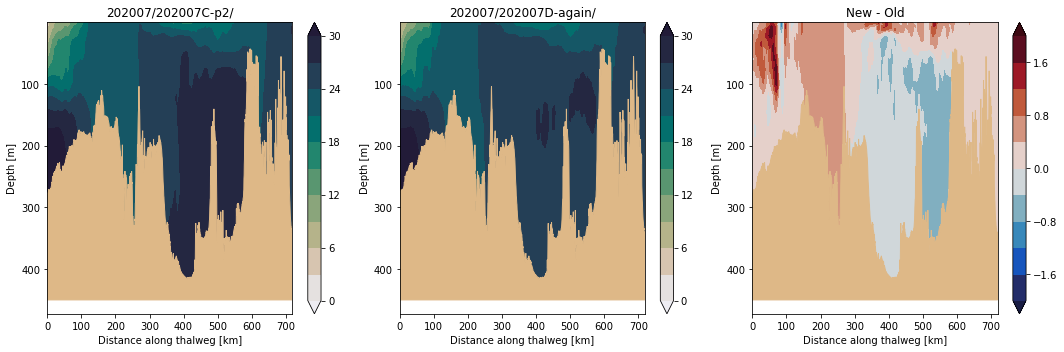

In [98]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## November Nitrate versus H201812

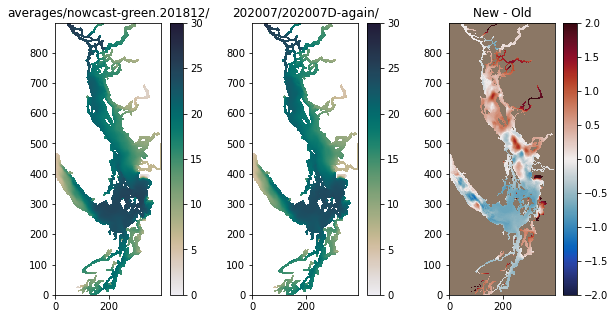

In [99]:
tracer = 'nitrate'
file = 'ptrc'
month = '11'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/nowcast-green.201812/')

29.260987449538625 27.557801052719675


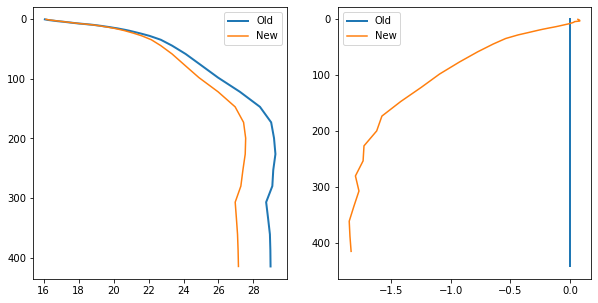

In [100]:
fig = profiles(tracer, file, olddir='averages/nowcast-green.201812/')

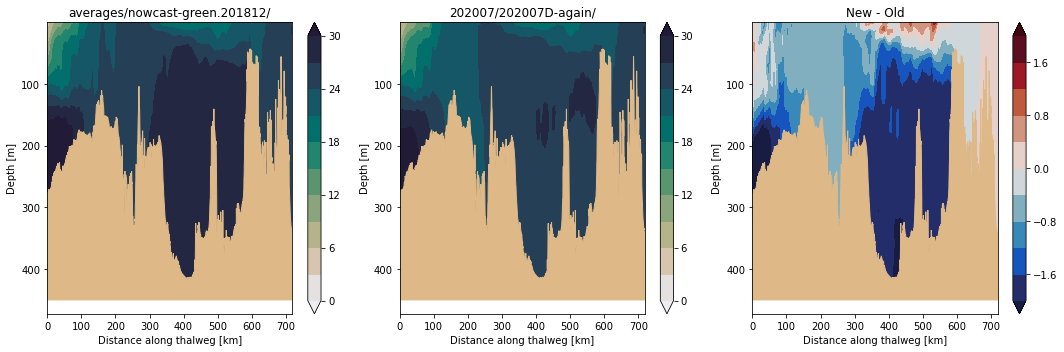

In [101]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/nowcast-green.201812/')

## December Alkalinity

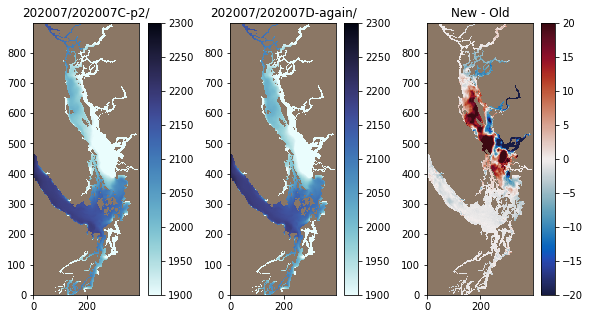

In [102]:
tracer = 'total_alkalinity'
file = 'carp'
month = '12'
cmap = cm.ice_r
cmap.set_bad('#8b7765')
cdiff = cm.balance
vmax = 2300
vmin = 1900
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2215.550810544874 2215.9355496915473


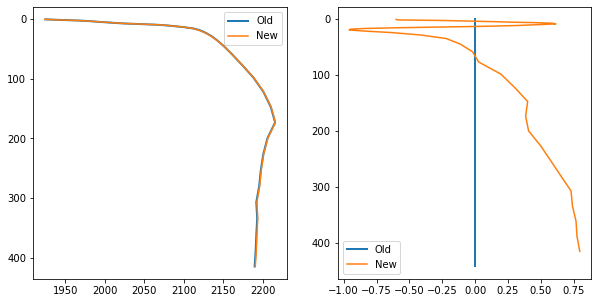

In [103]:
fig = profiles(tracer, file)

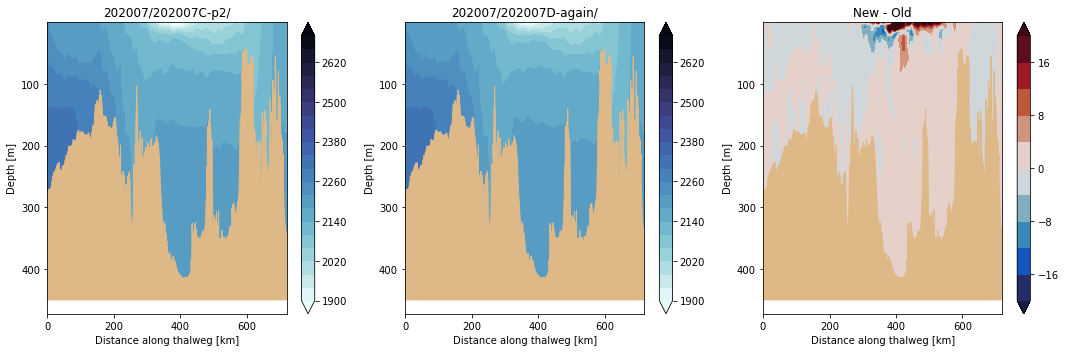

In [104]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## December Fraser Tracer

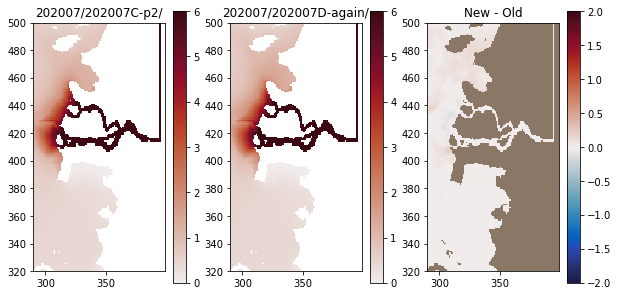

In [105]:
tracer = 'Fraser_tracer'
file = 'carp'
month = '12'
cmap = cm.amp
cdiff = cm.balance
vmax = 6
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dl=3,
                    zoom=[320, 500, 290, 398])

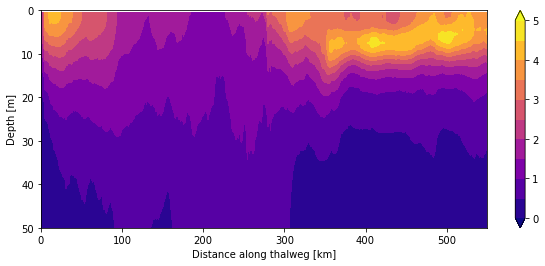

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/202007/202007D-again/SalishSea_1m_201606_201606_ptrc_T.nc')
mean_field = np.array(2*(dm.diatoms[0] + dm.flagellates[0] + dm.ciliates[0]))
ax.set_ylim(0, 50)
ax.set_xlim(0, 550)
vmax = 5
colours = vis.contour_thalweg(ax, mean_field, bathy, mesh,
                              np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap='plasma')

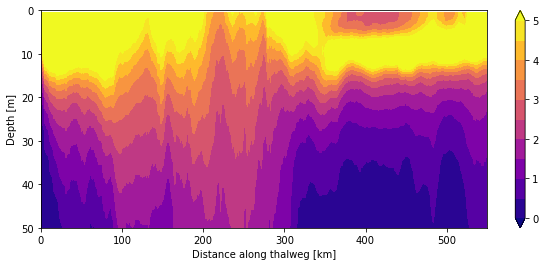

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/averages/nowcast-green.201812/SalishSea_1m_201606_201606_ptrc_T.nc')
mean_field = np.array(2*(dm.diatoms[0] + dm.flagellates[0] + dm.ciliates[0]))
ax.set_ylim(0, 50)
ax.set_xlim(0, 550)
vmax = 5
colours = vis.contour_thalweg(ax, mean_field, bathy, mesh,
                              np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap='plasma')

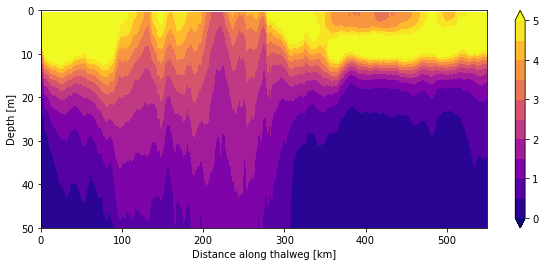

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_201606_201606_ptrc_T.nc')
mean_field = np.array(2*(dm.diatoms[0] + dm.flagellates[0] + dm.ciliates[0]))
ax.set_ylim(0, 50)
ax.set_xlim(0, 550)
vmax = 5
colours = vis.contour_thalweg(ax, mean_field, bathy, mesh,
                              np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap='plasma')

## My Points 

In [106]:
month = '06'
file = 'ptrc'
olddir='202007/202007C-p2/'
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

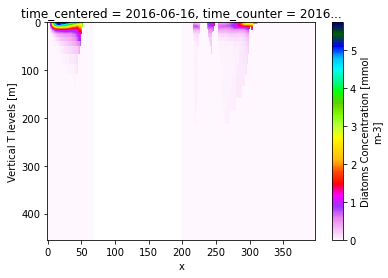

In [107]:
dm.diatoms[0, :, 400, :].plot(yincrease=False, cmap='gist_ncar_r');

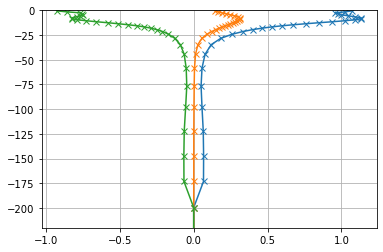

In [108]:
jj = 280
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-220, 0);

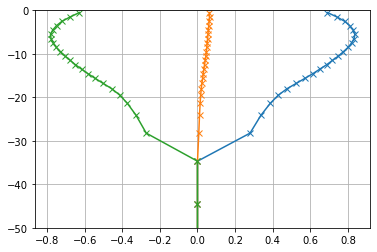

In [109]:
jj = 240
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

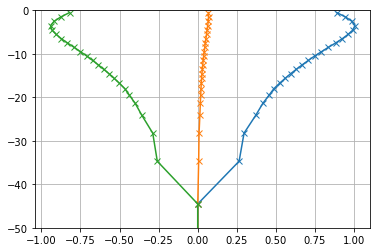

In [110]:
jj = 245
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

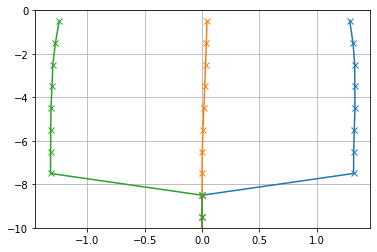

In [111]:
jj = 249
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

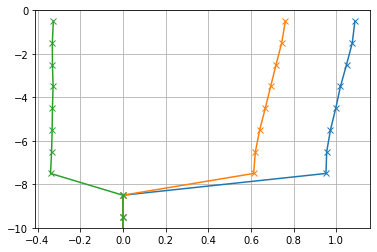

In [112]:
jj = 249
field = 'flagellates'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

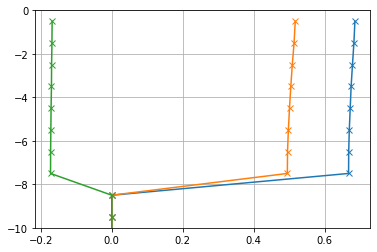

In [113]:
jj = 249
field = 'microzooplankton'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

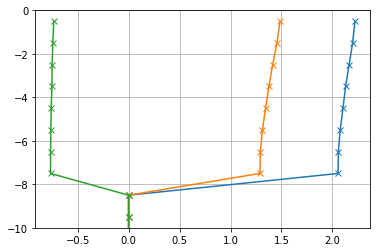

In [114]:
jj = 249
field = 'dissolved_organic_nitrogen'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

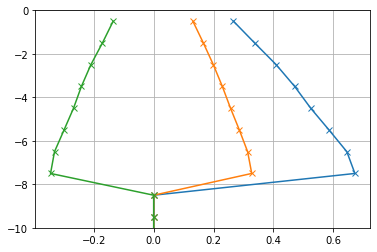

In [115]:
jj = 249
field = 'particulate_organic_nitrogen'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

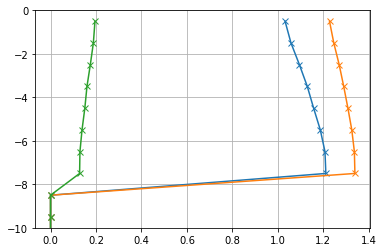

In [116]:
jj = 249
field = 'ammonium'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

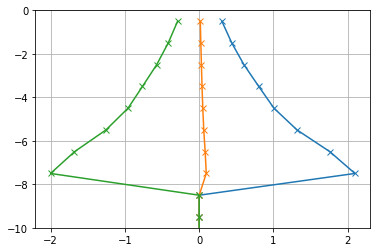

In [117]:
jj = 249
field = 'biogenic_silicon'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

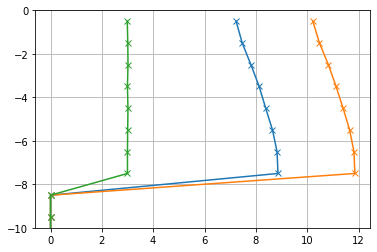

In [118]:
jj = 249
field = 'nitrate'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

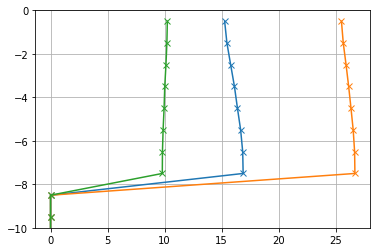

In [119]:
jj = 249
field = 'silicon'
plt.plot(dm[field][0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds[field][0, :, 400, jj]-dm[field][0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-10, 0);

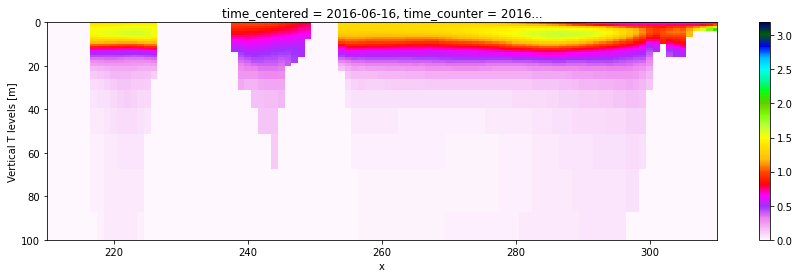

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 400, :]+ds.flagellates[0, :, 400, :]).plot(ax=ax, yincrease=False, cmap='gist_ncar_r');
ax.set_ylim(100, 0);
ax.set_xlim(210, 310);

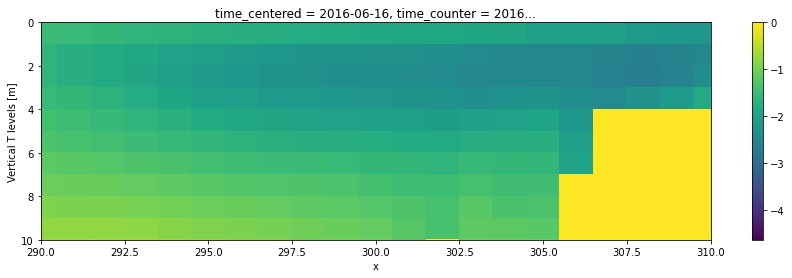

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 400, :]+0*ds.flagellates[0, :, 400, :]
-(dm.diatoms[0, :, 400, :]+0*dm.flagellates[0, :, 400, :])).plot(ax=ax, yincrease=False, cmap='viridis'
                                                                );
ax.set_ylim(10, 0);
ax.set_xlim(290, 310);

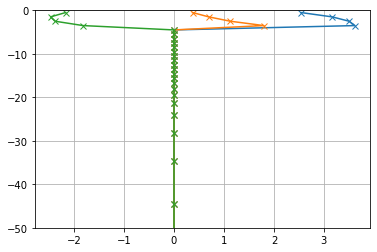

In [122]:
jj = 310
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

In [123]:
month = '03'
file = 'ptrc'
olddir='202007/202007C-p2/'
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

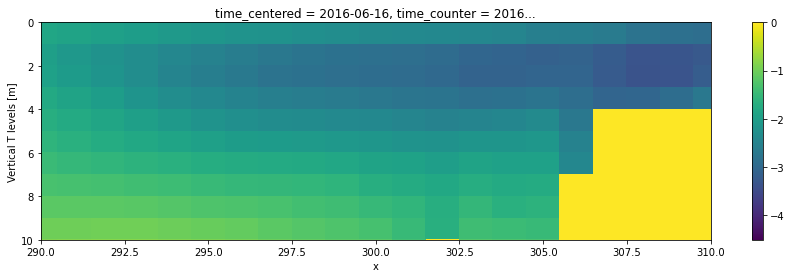

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 400, :]+ds.flagellates[0, :, 400, :]
-(dm.diatoms[0, :, 400, :]+dm.flagellates[0, :, 400, :])).plot(ax=ax, yincrease=False, 
                                                               cmap='viridis');
ax.set_ylim(10, 0);
ax.set_xlim(290, 310);

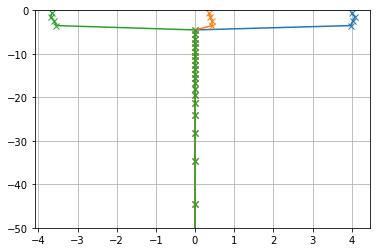

In [125]:
jj = 310
plt.plot(dm.diatoms[0, :, 400, jj], -dm.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.plot(ds.diatoms[0, :, 400, jj]-dm.diatoms[0, :, 400, jj], -ds.deptht[:], '-x');
plt.grid()
plt.ylim(-50, 0);

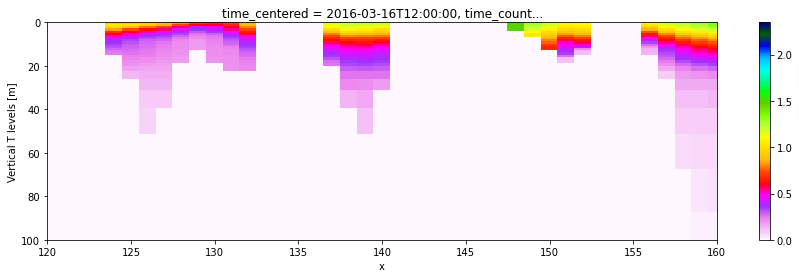

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 600, :]+ds.flagellates[0, :, 600, :]).plot(ax=ax, yincrease=False, cmap='gist_ncar_r');
ax.set_ylim(100, 0);
ax.set_xlim(120, 160);

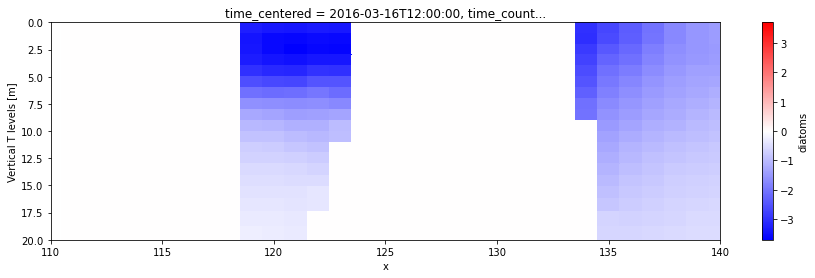

In [127]:
ii = 625
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, ii, :]-dm.diatoms[0, :, ii, :]).plot(ax=ax, yincrease=False, cmap='bwr');
ax.set_ylim(20, 0);
ax.set_xlim(110, 140);

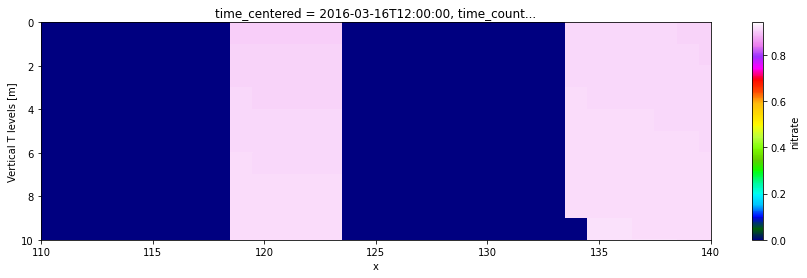

In [128]:
ii = 625
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.nitrate[0, :, ii, :]/(ds.nitrate[0,:, ii,:] + 2)).plot(ax=ax, yincrease=False, cmap='gist_ncar');
ax.set_ylim(10, 0);
ax.set_xlim(110, 140);

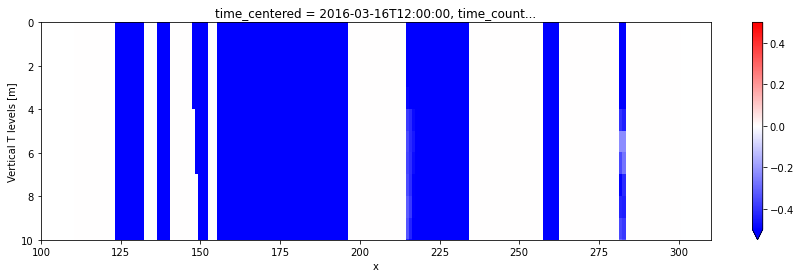

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 600, :]+ds.flagellates[0, :, 600, :]
-(dm.diatoms[0, :, 600, :]+dm.flagellates[0, :, 600, :])).plot(ax=ax, yincrease=False, cmap='bwr', vmax=0.5);
ax.set_ylim(10, 0);
ax.set_xlim(100, 310);

In [132]:
month = '06'
file = 'ptrc'
olddir='202007/202007C-p2/'
dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

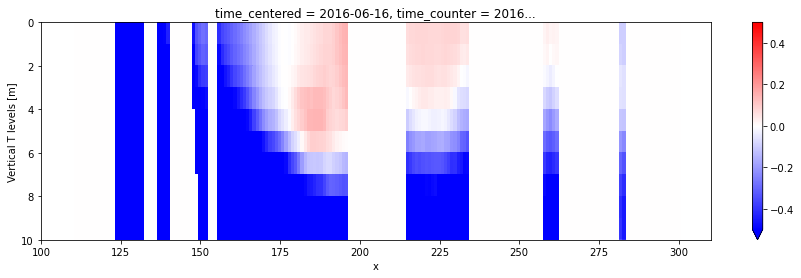

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, 600, :]+ds.flagellates[0, :, 600, :]
-(dm.diatoms[0, :, 600, :]+dm.flagellates[0, :, 600, :])).plot(ax=ax, yincrease=False, cmap='bwr', vmax=0.5);
ax.set_ylim(10, 0);
ax.set_xlim(100, 310);

(100.0, 310.0)

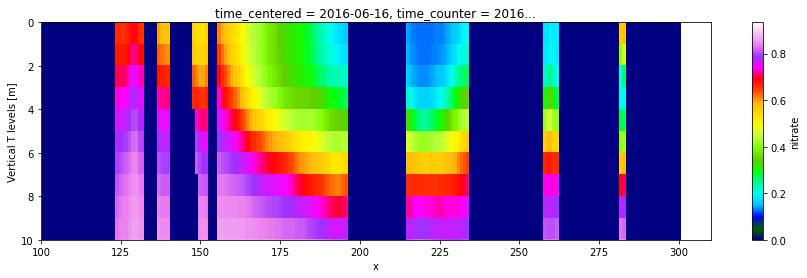

In [134]:
ii = 600
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.nitrate[0, :, ii, :]/(ds.nitrate[0,:, ii,:] + 2)).plot(ax=ax, yincrease=False, cmap='gist_ncar');
ax.set_ylim(10, 0);
ax.set_xlim(100, 310)

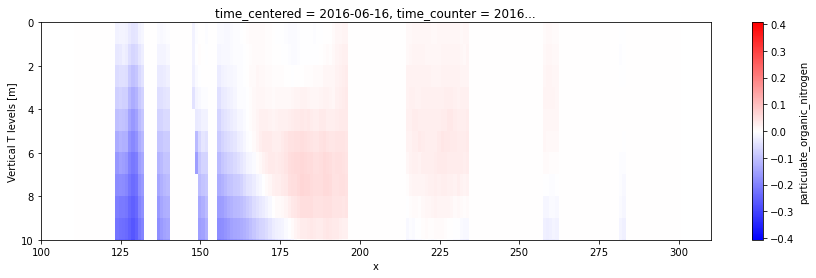

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.particulate_organic_nitrogen[0, :, 600, :]
-(dm.particulate_organic_nitrogen[0, :, 600, :])).plot(ax=ax, yincrease=False, 
                                                       cmap='bwr');
ax.set_ylim(10, 0);
ax.set_xlim(100, 310);

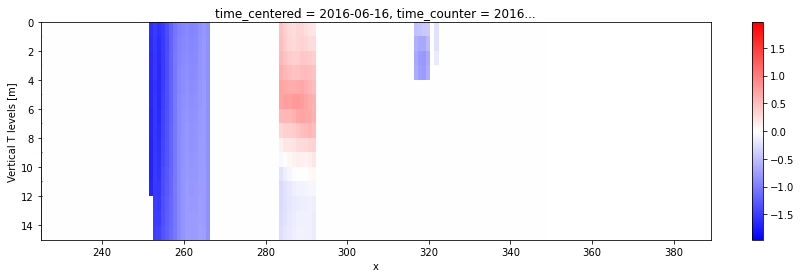

In [136]:
ii = 200
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.diatoms[0, :, ii, :]+0*ds.flagellates[0, :, ii, :]
-(dm.diatoms[0, :, ii, :]+0*dm.flagellates[0, :, ii, :])).plot(ax=ax, yincrease=False, cmap='bwr');
ax.set_ylim(15, 0);
ax.set_xlim(225, 389);

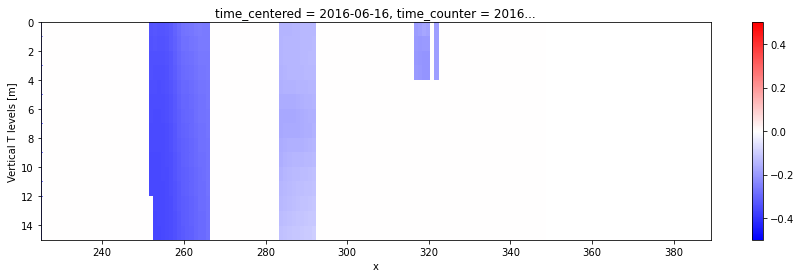

In [137]:
ii = 200
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
(ds.microzooplankton[0, :, ii, :]+0*ds.flagellates[0, :, ii, :]
-(dm.microzooplankton[0, :, ii, :]+0*dm.flagellates[0, :, ii, :])).plot(ax=ax, yincrease=False, cmap='bwr', vmax=0.5);
ax.set_ylim(15, 0);
ax.set_xlim(225, 389);